In [94]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator # type: ignore
from sklearn.datasets import fetch_openml # type: ignore
from sklearn.model_selection import cross_val_score # type: ignore
from sklearn.metrics import f1_score, make_scorer, accuracy_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore


In [85]:
mnist = fetch_openml('mnist_784')
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [86]:
X = mnist["data"]
y = mnist["target"]
X.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [88]:
X, y = X.to_numpy(), y.to_numpy()
print(X)
print(y)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


In [119]:
idxs = np.where(np.logical_or(y == "0", y == "6"))[0]
print(idxs)

ord_enc = LabelEncoder()

X_filtered = X[idxs]
y_filtered = ord_enc.fit_transform(y[idxs].astype(int))

print(X_filtered)
print(y_filtered)


[    1    13    18 ... 69989 69993 69999]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 1 ... 1 0 1]


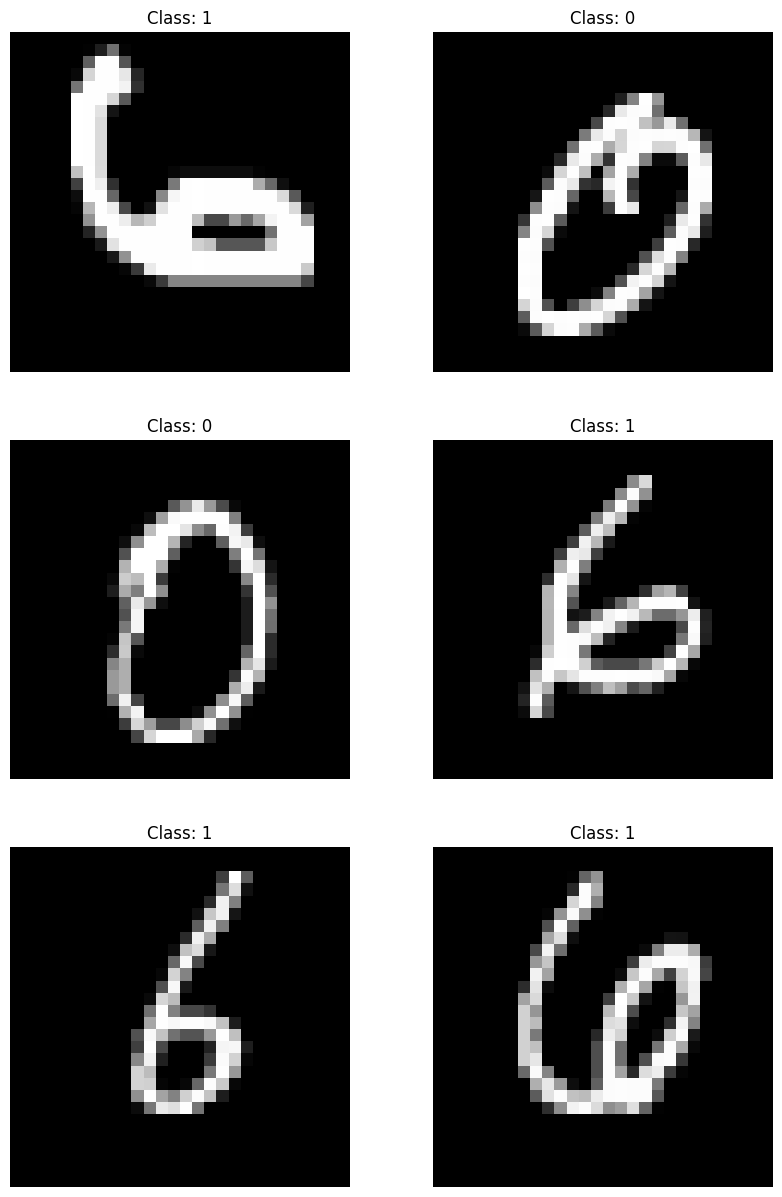

In [120]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
ax = ax.flatten()

for axis in ax:
  idx = np.random.randint(0, X_filtered.shape[0])
  image = X_filtered[idx]
  image = image.reshape(28, 28)
  axis.imshow(image, cmap='gray')
  axis.axis("off")
  axis.set_title(f'Class: {y_filtered[idx]}')
plt.show()

In [121]:
class Perceptron(BaseEstimator):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
      
    # for BaseEstimator
    def get_params(self, deep=True):
        return {
            "eta": self.eta,
            "n_iter": self.n_iter,
            "random_state": self.random_state,
        }

    # for BaseEstimator
    def set_params(self, **params):
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        rgen = np.random.default_rng(self.random_state)
        self.w_ = rgen.normal(
            loc=0.0,
            scale=0.01,
            size=X.shape[1],
        )
        self.b_ = np.float64(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.05)

In [123]:
per_clf = Perceptron(eta=0.01, n_iter=55, random_state=32)


# per_clf.fit(X_train, y_train)

# pred = per_clf.predict(X_test)
# print(pred)
# print(pred == y_test)

# per_clf.fit(X_filtered, y_filtered)

print(cross_val_score(per_clf, X_filtered, y_filtered, cv=3, scoring=make_scorer(accuracy_score)))

# print(y_filtered[[x for x in range(0, 10)]])
# print(per_clf.predict(X_filtered[[x for x in range(0, 10)]]))


[0.98889615 0.98258219 0.9865012 ]
